DCT Coefficients: [ 3.70725100e-15  5.84956835e-01  1.52686024e-14  6.35394502e-01
  5.53203316e-15  7.68524057e-01  5.48693035e-15  1.12474519e+00
 -6.59888810e-15  2.99910330e+00 -1.62234399e+00 -2.69018436e+00
  1.29757316e-15 -8.09911887e-01 -2.26554886e-15 -4.41115864e-01
 -6.28316843e-15 -2.87003792e-01  3.16413562e-15 -2.03739642e-01
  5.22498711e-15 -1.52233193e-01  4.28129754e-15 -1.17529095e-01
  7.68829445e-15 -9.26953435e-02  1.06858966e-14 -7.40903487e-02
 -3.80251386e-15 -5.96224169e-02  1.45439216e-14 -4.80055956e-02
  3.16413562e-15 -3.84047252e-02  1.24344979e-14 -3.02512943e-02
 -1.06581410e-14 -2.31412004e-02 -6.99440506e-15 -1.67745892e-02
 -5.32907052e-15 -1.09184811e-02 -6.43929354e-15 -5.38218921e-03
  4.99600361e-16]
Thresholded DCT Coefficients: [ 0.          0.58495683  0.          0.6353945   0.          0.76852406
  0.          1.12474519  0.          2.9991033  -1.62234399 -2.69018436
  0.         -0.80991189  0.          0.          0.          0.
  0.    

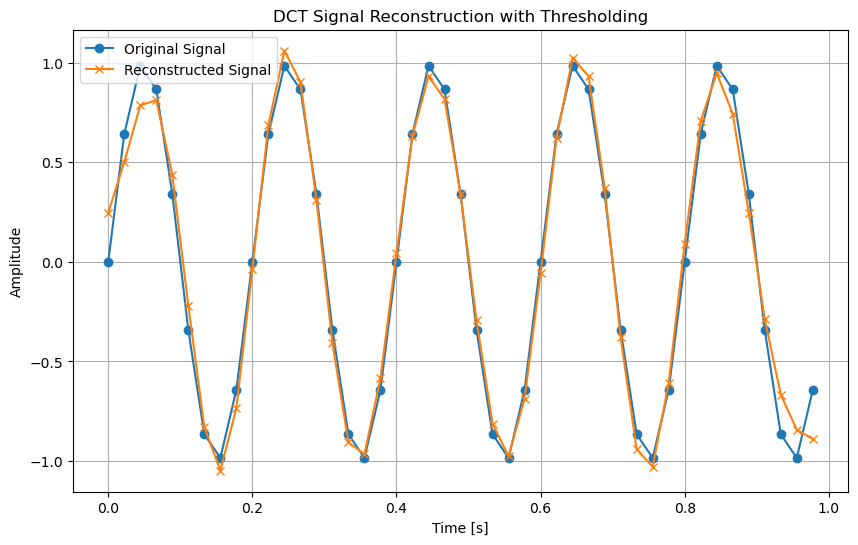

In [1]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt


f = 50  # częstotliwość sygnału w Hz
fs = 45  # częstotliwość próbkowania w Hz
t = np.arange(0, 1, 1/fs)  # czas próbkowania
signal = np.sin(2 * np.pi * f * t)  # generowanie sygnału o częstotliwości f = 50 Hz

# Zastosowanie DCT
dct_coeffs = dct(signal, norm='ortho')
print("DCT Coefficients:", dct_coeffs)

# Thresholding
threshold = 0.5
dct_coeffs_thresholded = np.where(np.abs(dct_coeffs) < threshold, 0, dct_coeffs)
print("Thresholded DCT Coefficients:", dct_coeffs_thresholded)

# Rekonstrukcja sygnału za pomocą IDCT
reconstructed_signal = idct(dct_coeffs_thresholded, norm='ortho')
print("Reconstructed Signal:", reconstructed_signal)

# Wykres oryginalnego i zrekonstruowanego sygnału
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Original Signal', marker='o')
plt.plot(t, reconstructed_signal, label='Reconstructed Signal', marker='x')
plt.title('DCT Signal Reconstruction with Thresholding')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


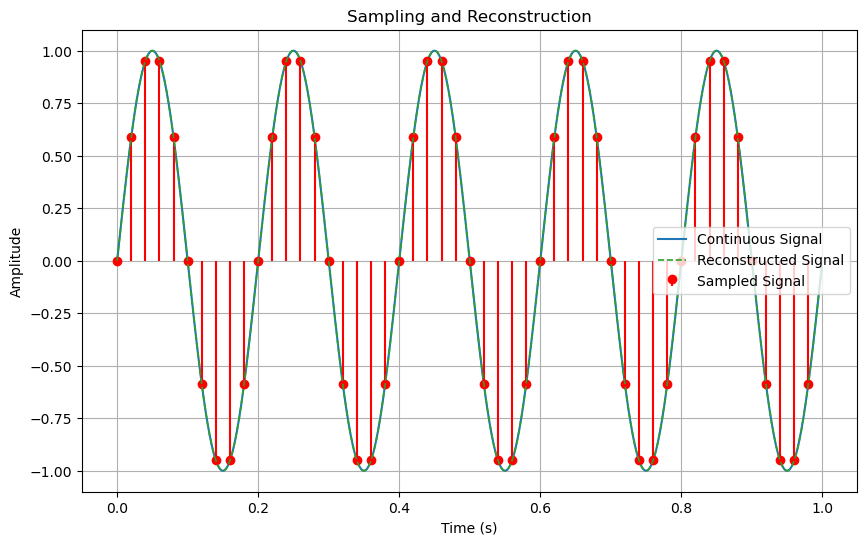

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# Oryginalny sygnał ciągły
fs_continuous = 1000  # Częstotliwość próbkowania dla wizualizacji
t_continuous = np.linspace(0, 1, fs_continuous, endpoint=False)
signal_continuous = np.sin(2 * np.pi * 5 * t_continuous)  # Sygnał o częstotliwości 5 Hz

# Próbkowanie
fs_sampled = 50  # Próbkowanie przy 50 Hz
t_sampled = np.linspace(0, 1, fs_sampled, endpoint=False)
signal_sampled = np.sin(2 * np.pi * 5 * t_sampled)  # Próbkowanie sygnału o 5 Hz

# Rekonstrukcja
fs_reconstructed = 1000  # Rekonstrukcja do 1000 Hz
t_reconstructed = np.linspace(0, 1, fs_reconstructed, endpoint=False)
signal_reconstructed = resample(signal_sampled, len(t_reconstructed))

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(t_continuous, signal_continuous, label="Continuous Signal", lw=1.5)
plt.stem(t_sampled, signal_sampled, linefmt='r-', markerfmt='ro', basefmt=" ", label="Sampled Signal")
plt.plot(t_reconstructed, signal_reconstructed, label="Reconstructed Signal", lw=1.2, linestyle='--')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sampling and Reconstruction")
plt.grid(True)
plt.show()
